In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Data Prepocessing, Normalize, Dimension Reduction

In [ ]:
adata = sc.read_mtx("SRR13482552/matrix.mtx")
adata = adata.T
gene = pd.read_table("SRR13482552/features.tsv", header = None)
gene = np.array(gene[1])
barcode = pd.read_table("SRR13482552/barcodes.tsv", header = None)
barcode = np.array(barcode[0])

In [ ]:
adata.obs_names = barcode
adata.var_names = gene
adata

In [ ]:
adata.var_names_make_unique()
adata.obs

# Read h5ad file

In [12]:
healthy = sc.read_h5ad("GSE165080/GSE165080_Raw.h5ad")
raw = sc.read_h5ad("GSE165080_Raw.h5ad")

In [15]:
healthy.obs

,Age,Gender,country,ind_cov
CAAGGCCAGTATCGAA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,28.0,Female,Asian,HC-546
GAACATCCAGCTATTG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,33.0,Female,European,IGTB670_IGTB670
TACCTATTCTACTATC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,30.0,Female,European,IGTB1506_IGTB1506
GTCATTTCAGAGTGTG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0,68.0,Female,European,HC-540
AAAGATGGTTCACGGC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0,53.0,Female,European,HC-006
...,...,...,...,...
CCTCAGTCAGCTGTAT-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,34.0,Female,European,IGTB195_IGTB195
ATCTACTAGGAGTTGC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0,33.0,Female,European,IGTB1827_IGTB1827
GAATGAACACCGGAAA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,49.0,Female,European,HC-554
TAGCCGGGTACCGAGA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0,27.0,Female,European,IGTB1895_IGTB1895


In [25]:
raw

AnnData object with n_obs × n_vars = 46794 × 36601
    obs: 'Age', 'Gender', 'BioSample'

In [17]:
raw.var_names_make_unique()
raw.obs_names_make_unique()
sc.pp.filter_cells(raw, min_genes=200)
sc.pp.filter_genes(raw, min_cells=3)

AnnData object with n_obs × n_vars = 486418 × 1999
    obs: 'Age', 'Gender', 'country', 'ind_cov'
    var: 'gene_ids'

In [20]:
healthy.X[1,12]

-0.07282985

In [28]:
raw.var['mt'] = raw.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(raw, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

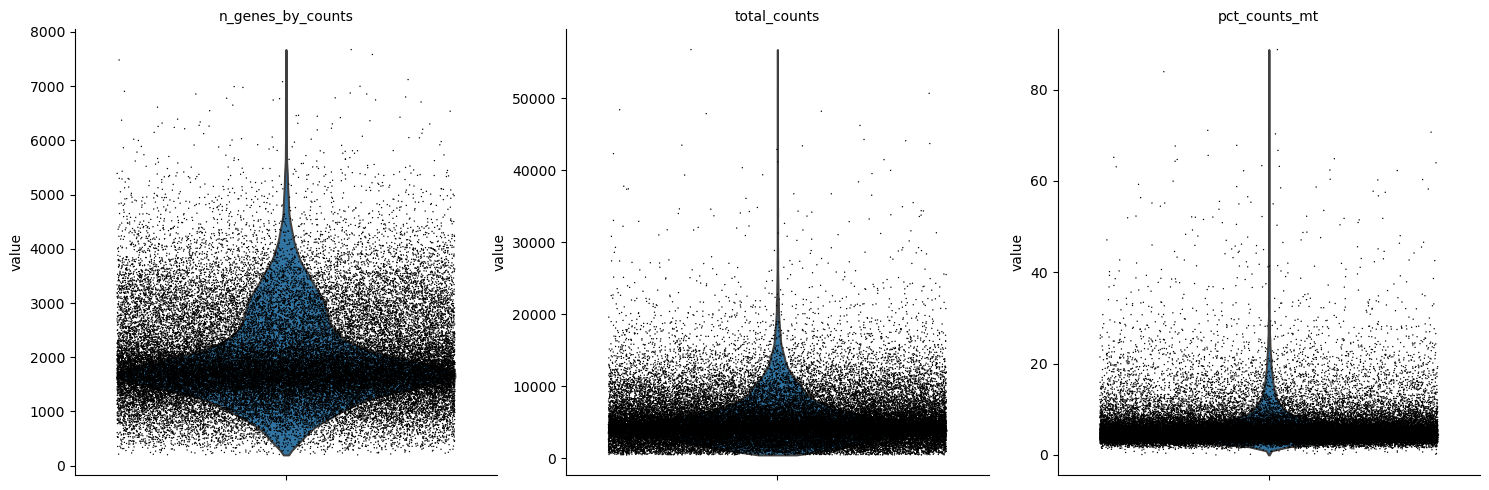

In [29]:
sc.pl.violin(raw, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [30]:
raw = raw[raw.obs.n_genes_by_counts < 6000, :]
raw = raw[raw.obs.pct_counts_mt < 25, :]
raw

View of AnnData object with n_obs × n_vars = 46160 × 27426
    obs: 'Age', 'Gender', 'BioSample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

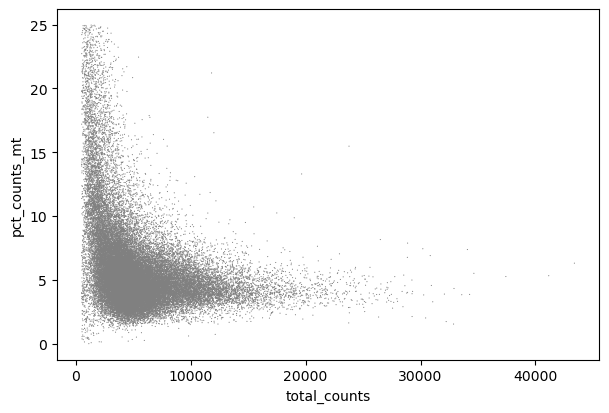

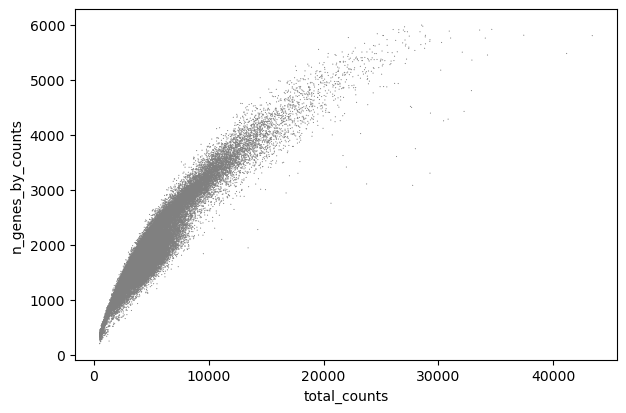

In [31]:
sc.pl.scatter(raw, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(raw, x='total_counts', y='n_genes_by_counts')

In [32]:
sc.pp.normalize_total(raw, target_sum=1e4)

/home/benson0207/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [33]:
sc.pp.log1p(raw)
raw.raw = raw
raw

AnnData object with n_obs × n_vars = 46160 × 27426
    obs: 'Age', 'Gender', 'BioSample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [34]:
# linear regression out unwanted sources of variation
sc.pp.regress_out(raw, ['total_counts', 'pct_counts_mt'])

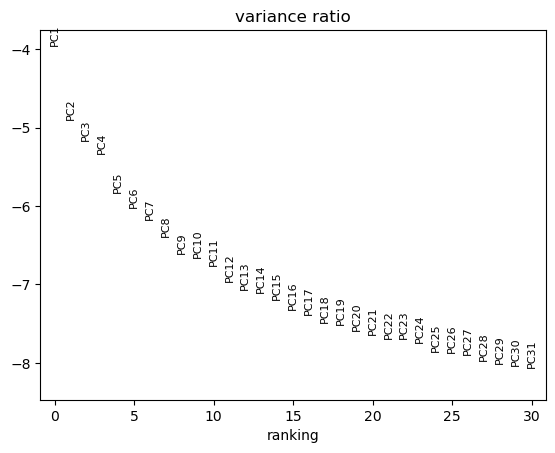

In [35]:
sc.pp.scale(raw, max_value=10)
sc.tl.pca(raw, svd_solver='arpack')
sc.pl.pca_variance_ratio(raw, log=True)

In [ ]:
sc.pp.neighbors(healthy, n_neighbors=10, n_pcs=40)
sc.tl.leiden(healthy)

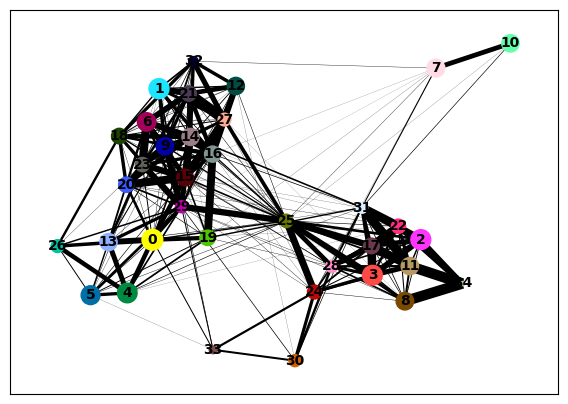

In [37]:
# default use leiden透過leiden去計算那個gene expression的部分去挑出最後的權重
#再多維的空間做hireachecal(階層的)挑選，clustering會越來越少，直到hirachical跟cluster一樣才會結束

sc.tl.paga(raw)
sc.pl.paga(raw)

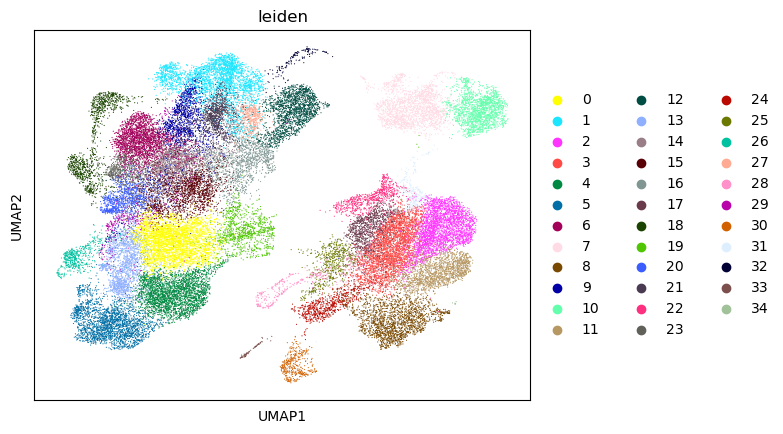

In [38]:
sc.tl.umap(raw, init_pos='paga')
sc.pl.umap(raw, color = "leiden")

In [42]:
raw.obs["cell_type_1"] = healthy.obs.cell_type_1
raw.obs

,Age,Gender,BioSample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type_1
AAACCTGAGAGTTGGC-1,34,female,SAMN17379694,3734,3734,11946.0,529.0,4.428260,2,Mono
AAACCTGAGGGCTTGA-1,34,female,SAMN17379694,2001,2001,4745.0,338.0,7.123288,20,other T
AAACCTGCAAGCTGTT-1,34,female,SAMN17379694,2471,2471,7979.0,384.0,4.812633,5,CD8 T
AAACCTGCAATAAGCA-1,34,female,SAMN17379694,1487,1487,2865.0,371.0,12.949389,9,NK
AAACCTGCAATGTAAG-1,34,female,SAMN17379694,2423,2423,6729.0,550.0,8.173576,9,CD8 T
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTGAACG-1,39,male,SAMN17379591,1054,1054,2108.0,136.0,6.451612,4,CD4 T
TTTGTCACACGGTAGA-1,39,male,SAMN17379591,757,757,1257.0,199.0,15.831344,16,CD8 T
TTTGTCACAGGACGTA-1,39,male,SAMN17379591,1882,1882,5846.0,178.0,3.044817,4,CD4 T
TTTGTCAGTCCAGTGC-1,39,male,SAMN17379591,1407,1407,3106.0,194.0,6.245975,15,CD8 T


In [43]:
raw.X

array([[-0.09066779, -0.00393468, -0.21565376, ..., -0.07497432,
        -0.0346786 , -0.00928552],
       [-0.05725301, -0.0126851 , -0.11237309, ..., -0.0331813 ,
        -0.02269676, -0.00802284],
       [-0.07223648, -0.00576441, -0.14439285, ..., -0.04369941,
        -0.0251255 , -0.00957073],
       ...,
       [-0.0622845 , -0.00138119, -0.0803007 , ..., -0.01207642,
        -0.01469097, -0.01148414],
       [-0.04961606, -0.0106247 , -0.06940491, ..., -0.01248983,
        -0.01596969, -0.00906427],
       [-0.051225  , -0.00346329, -0.04223493, ...,  0.00398955,
        -0.00992556, -0.01133289]], dtype=float32)

In [44]:
raw.write_h5ad("GSE165080_healthy.h5ad")

# 讀取已經寫好的檔案

In [ ]:
raw = sc.read_h5ad("Data/GSE165080_healthy.h5ad")

In [ ]:
raw

# 統整cells and genes的數量

In [ ]:
cells_and_genes = {}

for i in range(0, Raw.n_obs):
    cells_and_genes[Raw.obs.BioSample[i]] = []
for i in cells_and_genes:
    healthy = Raw[Raw.obs["BioSample"] == i, :]
    cells_and_genes[i] = [f"{healthy.n_obs}*{healthy.n_vars}"]
    print(i)

In [ ]:
cells_and_genes

# 紀錄檔案的性別、年齡、資料集

In [ ]:
adata.obs["Age"] = [44]*adata.n_obs
adata.obs["Gender"] = ["female"]*adata.n_obs
adata.obs["Dataset"] = ["SRR13482552"]*adata.n_obs
adata.obs

In [ ]:
adata.write_h5ad("Healthy.h5ad")

# 以下是GSE149689所需的code

In [ ]:
# barcode
# unfilter data
pre = adata.obs_names

# extract Healthy Donor from barcode
# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
pattern = r"-(5|13|14|19)$"
pre_healthy = pre[pre.str.contains(pattern)]


pre_healthy

In [ ]:
healthy = adata[adata.obs.index.isin(pre_healthy)]
healthy.X

In [ ]:
sc.pp.normalize_total(healthy, target_sum=1e4)

In [ ]:
sc.pp.log1p(healthy)
healthy.raw = healthy
healthy

In [ ]:
# linear regression out unwanted sources of variation
sc.pp.regress_out(healthy, ['total_counts', 'pct_counts_mt'])

In [ ]:
sc.pp.scale(healthy, max_value=10)
sc.tl.pca(healthy, svd_solver='arpack')
sc.pl.pca_variance_ratio(healthy, log=True)

In [ ]:
sc.pp.neighbors(healthy, n_neighbors=10, n_pcs=40)
sc.tl.leiden(healthy)

In [ ]:
# default use leiden透過leiden去計算那個gene expression的部分去挑出最後的權重
#再多維的空間做hireachecal(階層的)挑選，clustering會越來越少，直到hirachical跟cluster一樣才會結束

sc.tl.paga(healthy)
sc.pl.paga(healthy)

In [ ]:
sc.tl.umap(healthy, init_pos='paga')
sc.pl.umap(healthy, color = "leiden")

In [ ]:
healthy.write_h5ad("benson_pbmc_healthy_donor.h5ad")

In [ ]:
sc.pl.umap(healthy, color = "leiden")

In [ ]:
healthy